# Medical Insurance Charges Prediction

 ## Introduction & Objective

> This project analyzes medical insurance charges to understand which factors influence healthcare costs and to predict charges using machine learning. Predicting charges can help insurers, policymakers, and public health professionals plan resources and manage costs effectively. Features include age, sex, BMI, smoking status, number of children, and region. The goal is to identify key predictors and build models that can inform healthcare decision-making.

### 1. Load Data & Inspect

> The dataset contains 1338 entries with 7 columns. Charges are continuous, and categorical variables include sex, smoker status, and region. Understanding the structure of the data is important before modeling.


In [58]:
import pandas as pd

data = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(data)
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [60]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [61]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 2. Exploration Data Analysis (EDA)

> This histogram shows that the distribution of medical charges is positively skewed. Most patients have relatively low charges, while a smaller group experiences extremely high costs. This long right tail suggests that a few patients incur exceptionally high medical expenses, potentially due to chronic conditions or major medical events.

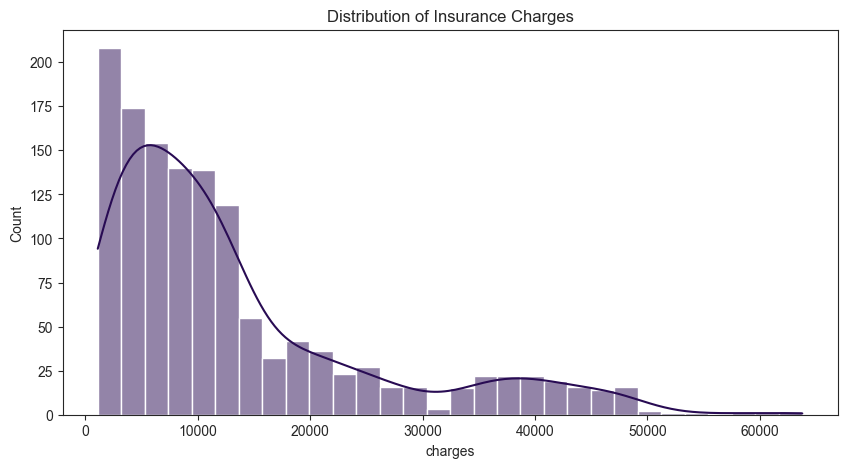

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

color = sns.color_palette("inferno")[0]
plt.figure(figsize=(10, 5)) 
sns.set_style('ticks')
sns.histplot(df['charges'], kde=True, color=color) 
plt.title("Distribution of Insurance Charges")
plt.show()

> This boxplot shows that smokers have significantly higher medical charges compared to non-smokers. The larger spread and higher median for smokers indicates that smoking status is likely a key predictor of charges.

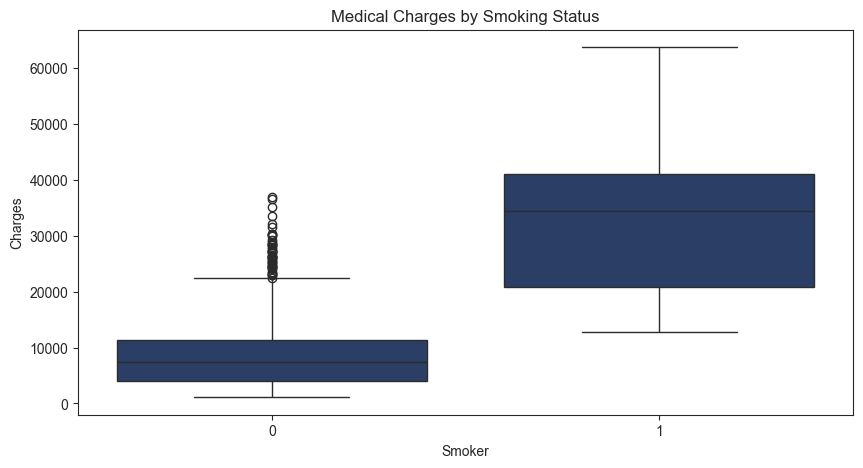

In [80]:
plt.figure(figsize=(10, 5))
color = sns.color_palette("cividis") [0]
sns.boxplot(x='smoker', y='charges', data=df, color=color)
plt.title("Medical Charges by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel ("Charges")
plt.show()

> The pairplot shows that age and BMI have positive relationships with medical charges. Older individuals and those with higher BMI tend to have higher medical costs, which is expected. The number of children shows a weak relationship with charges.

<Figure size 1200x1000 with 0 Axes>

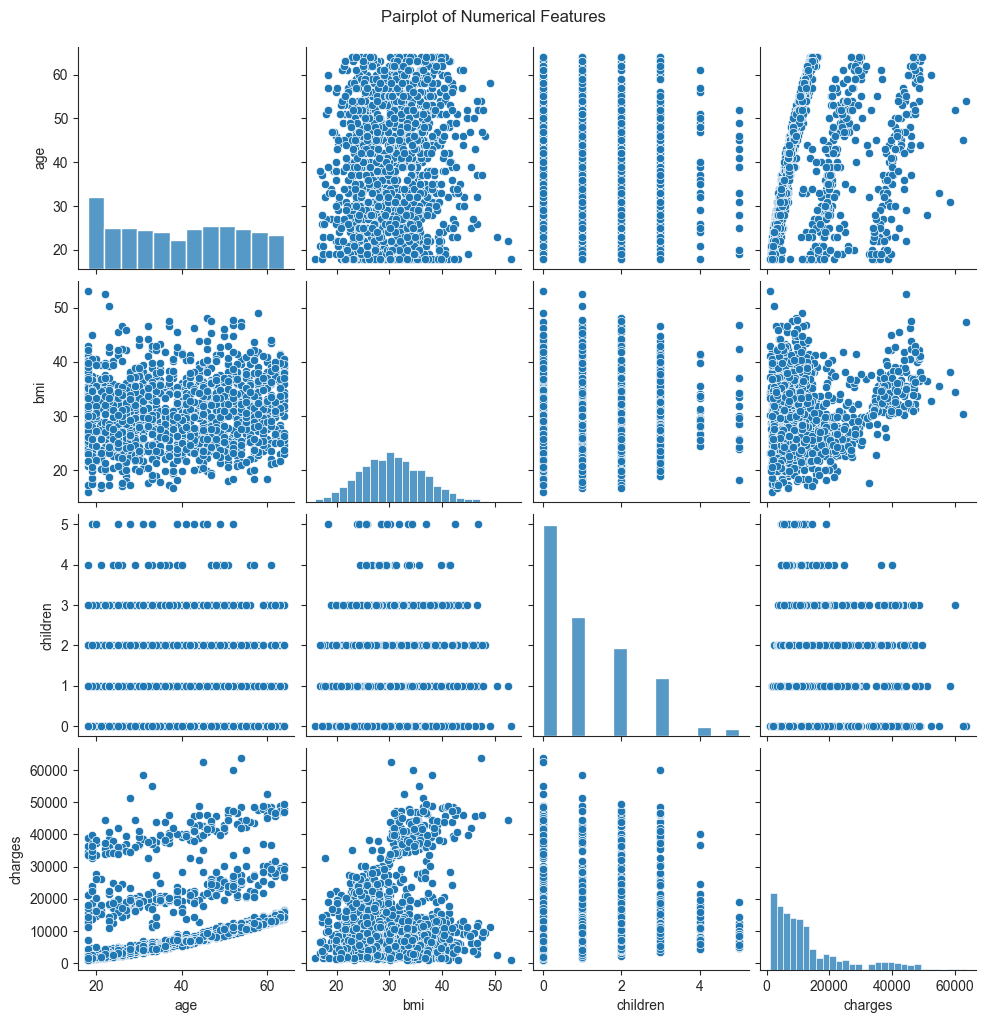

In [64]:
num_cols = ['age', 'bmi', 'children', 'charges']
plt.figure(figsize=(12, 10))
sns.pairplot(df[num_cols], diag_kind='hist', kind='scatter', corner=False)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

### 3. Data Preprocessing

> Categorical variables need to be encoded for machine learning models. In addition, numerical features are standardized to improve model performance.

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

charges = df['charges']
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])

df = pd.get_dummies(df, columns=['region'], drop_first=True) 

num_cols = ["age", "bmi", "children"]
scale = StandardScaler()
df[num_cols] = scale.fit_transform(df[num_cols])
df

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,-1.438764,0,-0.453320,-0.908614,1,16884.92400,False,False,True
1,-1.509965,1,0.509621,-0.078767,0,1725.55230,False,True,False
2,-0.797954,1,0.383307,1.580926,0,4449.46200,False,True,False
3,-0.441948,1,-1.305531,-0.908614,0,21984.47061,True,False,False
4,-0.513149,1,-0.292556,-0.908614,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,1.580926,0,10600.54830,True,False,False
1334,-1.509965,0,0.206139,-0.908614,0,2205.98080,False,False,False
1335,-1.509965,0,1.014878,-0.908614,0,1629.83350,False,True,False
1336,-1.296362,0,-0.797813,-0.908614,0,2007.94500,False,False,True


In [66]:
df.corr()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
region_northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


### 4. Train/Test Split

> Splitting the data into training and test sets ensures that we can evaluate model performance on unseen data. This also prevents overfitting and provides a more realistic assessment of how well the model generalizes. 

In [67]:
from sklearn.model_selection import train_test_split

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

### 5. Modeling


#### 5.1 Linear Regression

> The linear regression model provides a baseline for predicting medical charges. An R² of approximately 0.78 indicates that the model explains most of the variance in charges, although nonlinear effects may be missed.

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np 

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred) 
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
coef = model.coef_
intercept = model.intercept_

features = X.columns 
for feature, c in zip(features, coef):
    print(f"Coefficent {feature}: {c:.3f}")

print(f"Intercept: {intercept:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}, R^2: {r2:.3f}")


Coefficent age: 3609.149
Coefficent sex: -18.592
Coefficent bmi: 2054.885
Coefficent children: 512.479
Coefficent smoker: 23651.129
Coefficent region_northwest: -370.677
Coefficent region_southeast: -657.864
Coefficent region_southwest: -809.799
Intercept: 8946.082, MSE: 33596915.851, RMSE: 5796.285, R^2: 0.784


#### 5.2 Random Forest Regressor

> The Random Forest model captures nonlinear relationships and interactions between features, which provide more accurate predictions. An R² of 0.87 and lower RMSE than the linear model indicate that the model explains more variance and predicts charges closer to the actual values.

In [77]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)
rf_mape = np.mean(np.abs((y_test - rf_pred) / y_test)) * 100

print(f"Random Forest - RMSE: {rf_mse:.3f}, R^2: {rf_r2:.3f}, MAPE: {rf_mape:.2f}%")


Random Forest - RMSE: 20963682.950, R^2: 0.865, MAPE: 32.10%


#### 5.3 Gradient Boosting Regressor

> Gradient Boosting slightly improves upon Random Forest, with the lowest RMSE and MAPE. Its R² of 0.87 indicates strong predictive performance and suggests it effectively captures complex feature interactions.

In [79]:
from sklearn.ensemble import GradientBoostingRegressor 

gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse) 
gb_r2 = r2_score(y_test, gb_pred)
gb_mape = np.mean(np.abs((y_test - gb_pred) / y_test)) * 100 

print(f" Gradient Boosting - RMSE: {gb_mse:.3f}, R^2: {gb_r2:.3f}, MAPE: {gb_mape:.2f}%")

 Gradient Boosting - RMSE: 19681630.008, R^2: 0.873, MAPE: 30.52%


### 6. Next Steps
> Future work could include hyperparameter tuning, adding interaction features, or exploring other ensemble models. Additional patient-level data such as medical history or lifestyle factors could further improve predictions. 